#**PREDICTION USING DECISION TREE ALGORITHM**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**EDA**

In [2]:
columns = ['Sepal length','Sepal width','Petal length','Petal width','Class']
df = pd.read_csv('iris.csv',names=columns)
df.reset_index(drop=True)

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Class           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.duplicated().value_counts()

False    147
True       3
dtype: int64

In [8]:
df['Class'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3},inplace=True)

In [9]:
df.corr()

,Sepal length,Sepal width,Petal length,Petal width,Class
Sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [10]:
df['Class'].unique()

array([1, 2, 3])

#**Data Visualization**

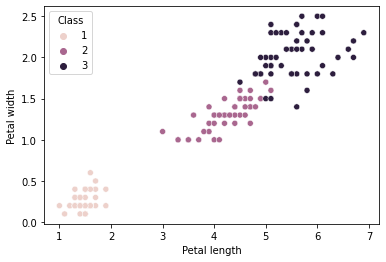

In [11]:
sns.scatterplot(x='Petal length',y='Petal width',data=df,hue='Class')

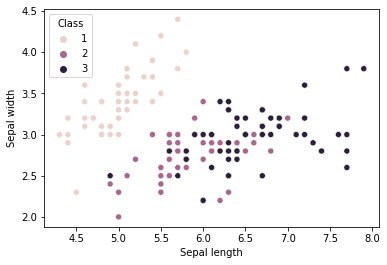

In [12]:
sns.scatterplot(x='Sepal length',y='Sepal width',data=df,hue='Class')

Text(69.0, 0.5, 'Actual')

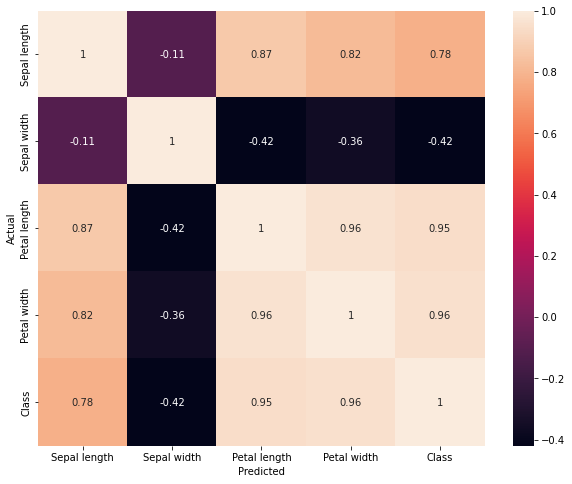

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0.5, 1.0, 'Count')

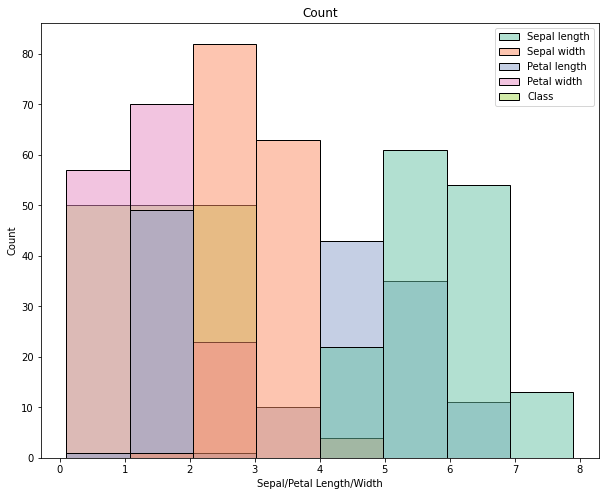

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,bins=8,palette='Set2')
plt.xlabel('Sepal/Petal Length/Width')
plt.title('Count')

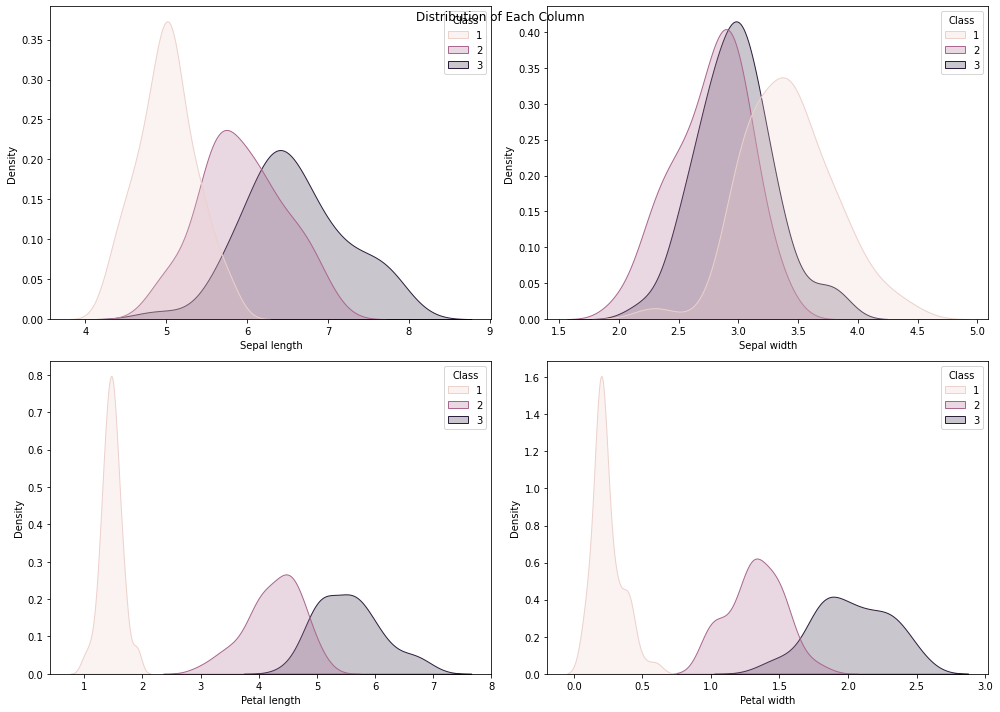

In [15]:
fig,axes = plt.subplots(figsize=(14,10),nrows=2,ncols=2)

plt.suptitle('Distribution of Each Column')
sns.kdeplot(data=df,x='Sepal length',hue='Class',shade=True,ax=axes[0][0])
sns.kdeplot(data=df,x='Sepal width',hue='Class',shade=True,ax=axes[0][1])
sns.kdeplot(data=df,x='Petal length',hue='Class',shade=True,ax=axes[1][0])
sns.kdeplot(data=df,x='Petal width',hue='Class',shade=True,ax=axes[1][1])
plt.tight_layout()
plt.show()

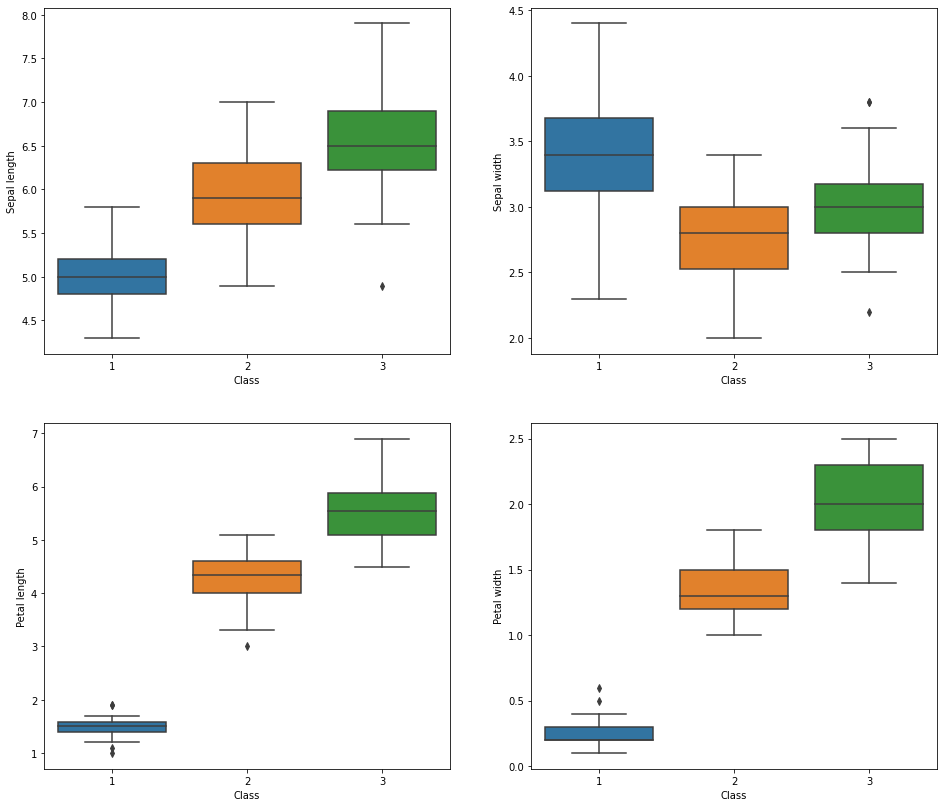

In [16]:
fig,axes = plt.subplots(figsize=(16,14),nrows=2,ncols=2)
sns.boxplot(x='Class',y='Sepal length',data=df,ax=axes[0][0])
sns.boxplot(x='Class',y='Sepal width',data=df,ax=axes[0][1])
sns.boxplot(x='Class',y='Petal length',data=df,ax=axes[1][0])
sns.boxplot(x='Class',y='Petal width',data=df,ax=axes[1][1])
plt.show()

#**Logistic Regression**

In [17]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

#**Decision Tree Classifier**

In [18]:
X = df.drop('Class',axis=1)

In [19]:
y = df['Class']

In [20]:
X

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)
X_train


,Sepal length,Sepal width,Petal length,Petal width
74,6.4,2.9,4.3,1.3
88,5.6,3.0,4.1,1.3
96,5.7,2.9,4.2,1.3
42,4.4,3.2,1.3,0.2
134,6.1,2.6,5.6,1.4
...,...,...,...,...
63,6.1,2.9,4.7,1.4
70,5.9,3.2,4.8,1.8
81,5.5,2.4,3.7,1.0
11,4.8,3.4,1.6,0.2


In [22]:
X_test.head()

,Sepal length,Sepal width,Petal length,Petal width
33,5.5,4.2,1.4,0.2
16,5.4,3.9,1.3,0.4
43,5.0,3.5,1.6,0.6
129,7.2,3.0,5.8,1.6
50,7.0,3.2,4.7,1.4


In [23]:
y_test

33     1
16     1
43     1
129    3
50     2
123    3
68     2
53     2
146    3
1      1
147    3
32     1
31     1
122    3
127    3
Name: Class, dtype: int64

In [24]:
y_train

74     2
88     2
96     2
42     1
134    3
      ..
63     2
70     2
81     2
11     1
95     2
Name: Class, Length: 135, dtype: int64

In [25]:
model = DecisionTreeClassifier()

In [26]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([1, 1, 1, 2, 2, 3, 2, 2, 3, 1, 3, 1, 1, 3, 3])

#**Accuracy**

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[6, 0, 0],
       [0, 3, 0],
       [0, 1, 5]])

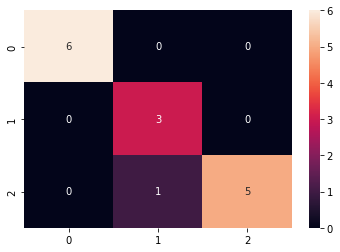

In [31]:
sns.heatmap(data=conf,annot=True)

In [32]:
model.score(X_test,y_test)*100

93.33333333333333

In [33]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.9333333333333333


#**Perform Evaluation on Test set**

In [34]:
clr = classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.75      1.00      0.86         3
           3       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.92      0.94      0.92        15
weighted avg       0.95      0.93      0.94        15



#**Visualize Decision Tree**

In [35]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [36]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [37]:
from sklearn.externals.six import StringIO

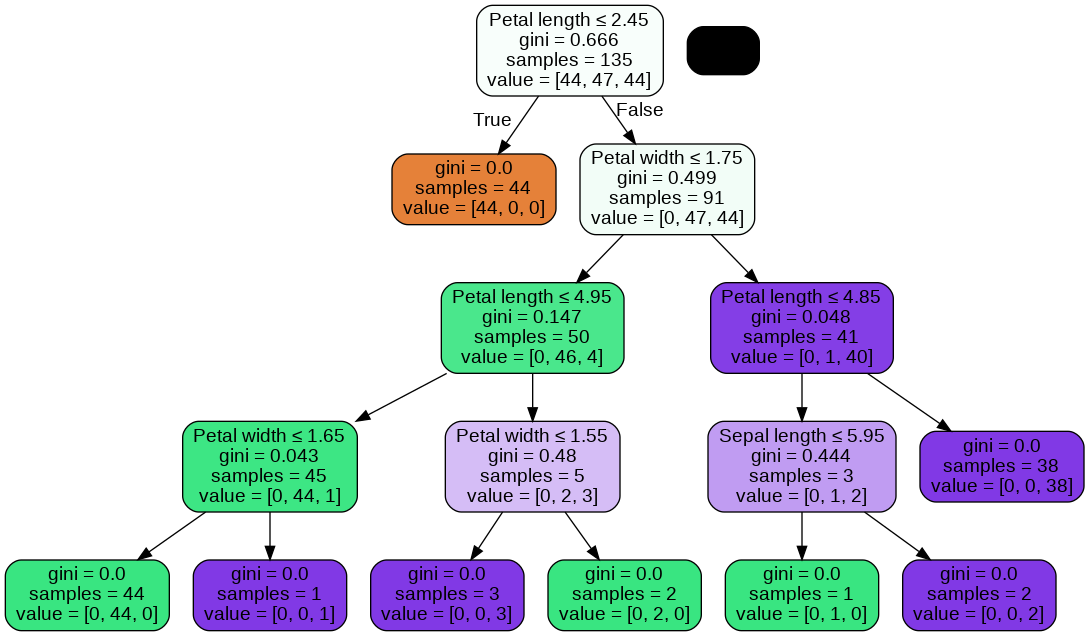

In [38]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=df.columns.drop('Class'),  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [39]:
model.predict([[4.8, 2.9, 1.3, 0.2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])